Easy 1: Number of unique customers: 5191
Unique IDs:
[    0     1     2 ... 10350 10587 10934]

Easy 2:
number of unique categories: 8
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Easy 3:
Popularest Payment Method:
payment_method
Cash    44447
Name: count, dtype: int64
used 44447 times

Medium 1:
The three most popular categories are as follows:
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: count, dtype: int64

Medium 2:
total amount spent by OLD PEOPLE: $ 22370553.27

Medium 3


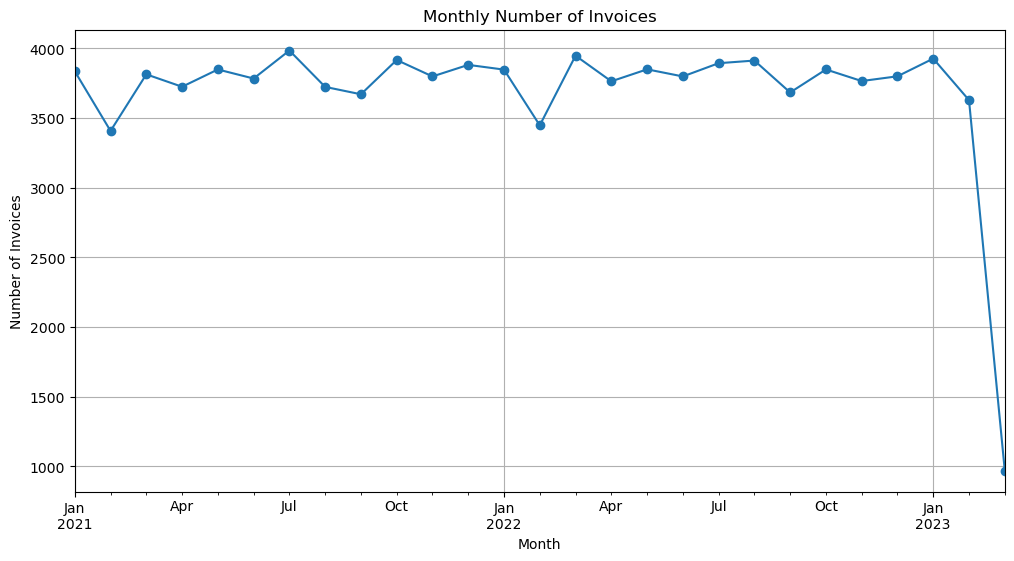

Pattern noticed is sales tank a significant margin after January


Hard
age_range        10.0-19.0   20.0-29.0   30.0-39.0   40.0-49.0   50.0-59.0  \
category                                                                     
Books              3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing         518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics         29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage    3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes            274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir           3296.13    15295.92    17548.08    17759.22    15084.78   
Technology       287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys              17203.20   102466.56   115297.28   106910.72    94115.84   

age_range         60.0-69.0   70.0-79.0   80.0-89.0      nan-nan  
category                                                          
Books        

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Easy 1
# read the big json file
df = pd.read_json('dim_customer.json')
# find the total unique ids
ucustomer = df['id'].nunique()
print(f"Easy 1: Number of unique customers: {ucustomer}")

print("Unique IDs:")
# displays all the unique ids
print(df['id'].unique())
print ()

# Easy 2
df = pd.read_csv('fct_invoice.csv')
print("Easy 2:")
# category count
cat=df['category'].nunique()
print (f"number of unique categories:",cat)
# categories
dog=df['category'].unique()
print(dog)
print()

# Easy 3
# frequency finder
print("Easy 3:")
fish=df['payment_method'].value_counts()
# "returns index of max element"
mpm = fish.head(1)
# highest count
mpc = fish.max()
print ("Popularest Payment Method:")
print (mpm)
print (f"used",mpc,"times")
print ()

# Medium 1
# GOD BLESS VALUE COUNT
print("Medium 1:")
matt=df['category'].value_counts()
# head? yes please
smith = matt.head(3)
print ("The three most popular categories are as follows:")
print (smith)
print()

# Medium 2
print("Medium 2:")
# Get list of OLD PEOPLE
dfcustomer = pd.read_json('dim_customer.json')
over45 = dfcustomer[dfcustomer['age'] > 45]

# uses the list of OLD PEOPLE and filters their id column against the csv
dfsale = pd.read_csv('fct_invoice.csv')
filter = dfsale[dfsale['customer_id'].isin(over45['id'])]

# addition andy and rounder
total=filter['price'].sum()
secdec = round(total,2)
print(f"total amount spent by OLD PEOPLE: $", secdec)
print()

# Medium 3
print ("Medium 3")
df = pd.read_csv('fct_invoice.csv')
# column conversion to datetime (makes it easier to chart yo)
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
# month sorter
monthly_counts = df.groupby(df['invoice_date'].dt.to_period('M')).size()

# timestamps
monthly_counts.index = monthly_counts.index.to_timestamp()

# i miss my iss
plt.figure(figsize=(12, 6))
monthly_counts.plot(marker='o')
plt.title('Monthly Number of Invoices')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.show()
print("Pattern noticed is sales tank a significant margin after January")
print()
print()

# Hard
print("Hard")
# the dynamic duo
dfcustomer = pd.read_json('dim_customer.json')
dfsale = pd.read_csv('fct_invoice.csv')
# decade ranges
def age_to_decade(age):
    lower = (age // 10) * 10
    upper = lower + 9
    return f"{lower}-{upper}"
dfcustomer['age_range'] = dfcustomer['age'].apply(age_to_decade)

# combine the info on both files to make my life way easier
merg = pd.merge(
    dfsale,
    dfcustomer[['id', 'age_range']],
    left_on='customer_id',
    right_on='id',
    how='left'
)

# guy who just learned how to make a pivot table
pivot = pd.pivot_table(
    merg,
    index='category',
    columns='age_range',
    values='price',
    aggfunc='sum',
    fill_value=0
)

print(pivot)
